In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


# **IMPORTING LIBRARIES**

In [2]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# **LOADING THE DATASET**

In [3]:
df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,b'Ideal',b'D',b'SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,b'Good',b'D',b'SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,b'Very Good',b'D',b'SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,b'Premium',b'H',b'SI2',61.0,58.0,2757.0,6.15,6.12,3.74


In [4]:
 dfcpy = df[['cut']].copy()

In [5]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# **EXPLORATORY DATA ANALYSIS**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='carat', ylabel='Density'>

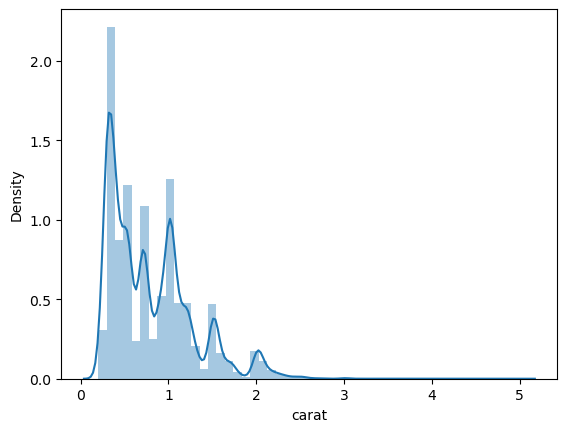

In [6]:
sns.distplot(df.carat)

In [7]:
fig = px.scatter(df, y="depth", x="cut", color="cut", symbol="cut")
fig.update_traces(marker_size=10)

In [8]:
print(df['color'].value_counts(ascending=True))

b'J'     2808
b'I'     5422
b'D'     6775
b'H'     8304
b'F'     9542
b'E'     9797
b'G'    11292
Name: color, dtype: int64


<AxesSubplot:xlabel='color', ylabel='count'>

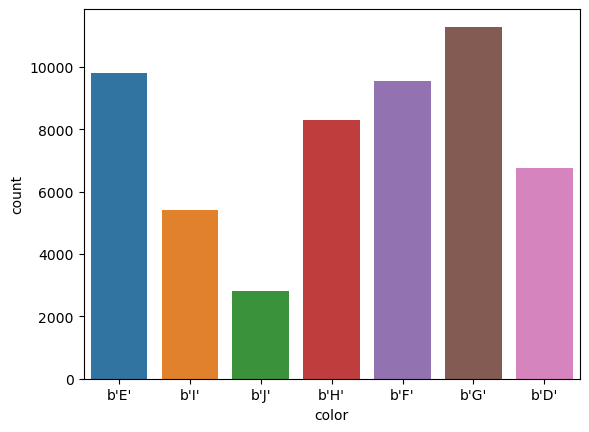

In [9]:
sns.countplot(x ='color', data = df)

<AxesSubplot:xlabel='color', ylabel='count'>

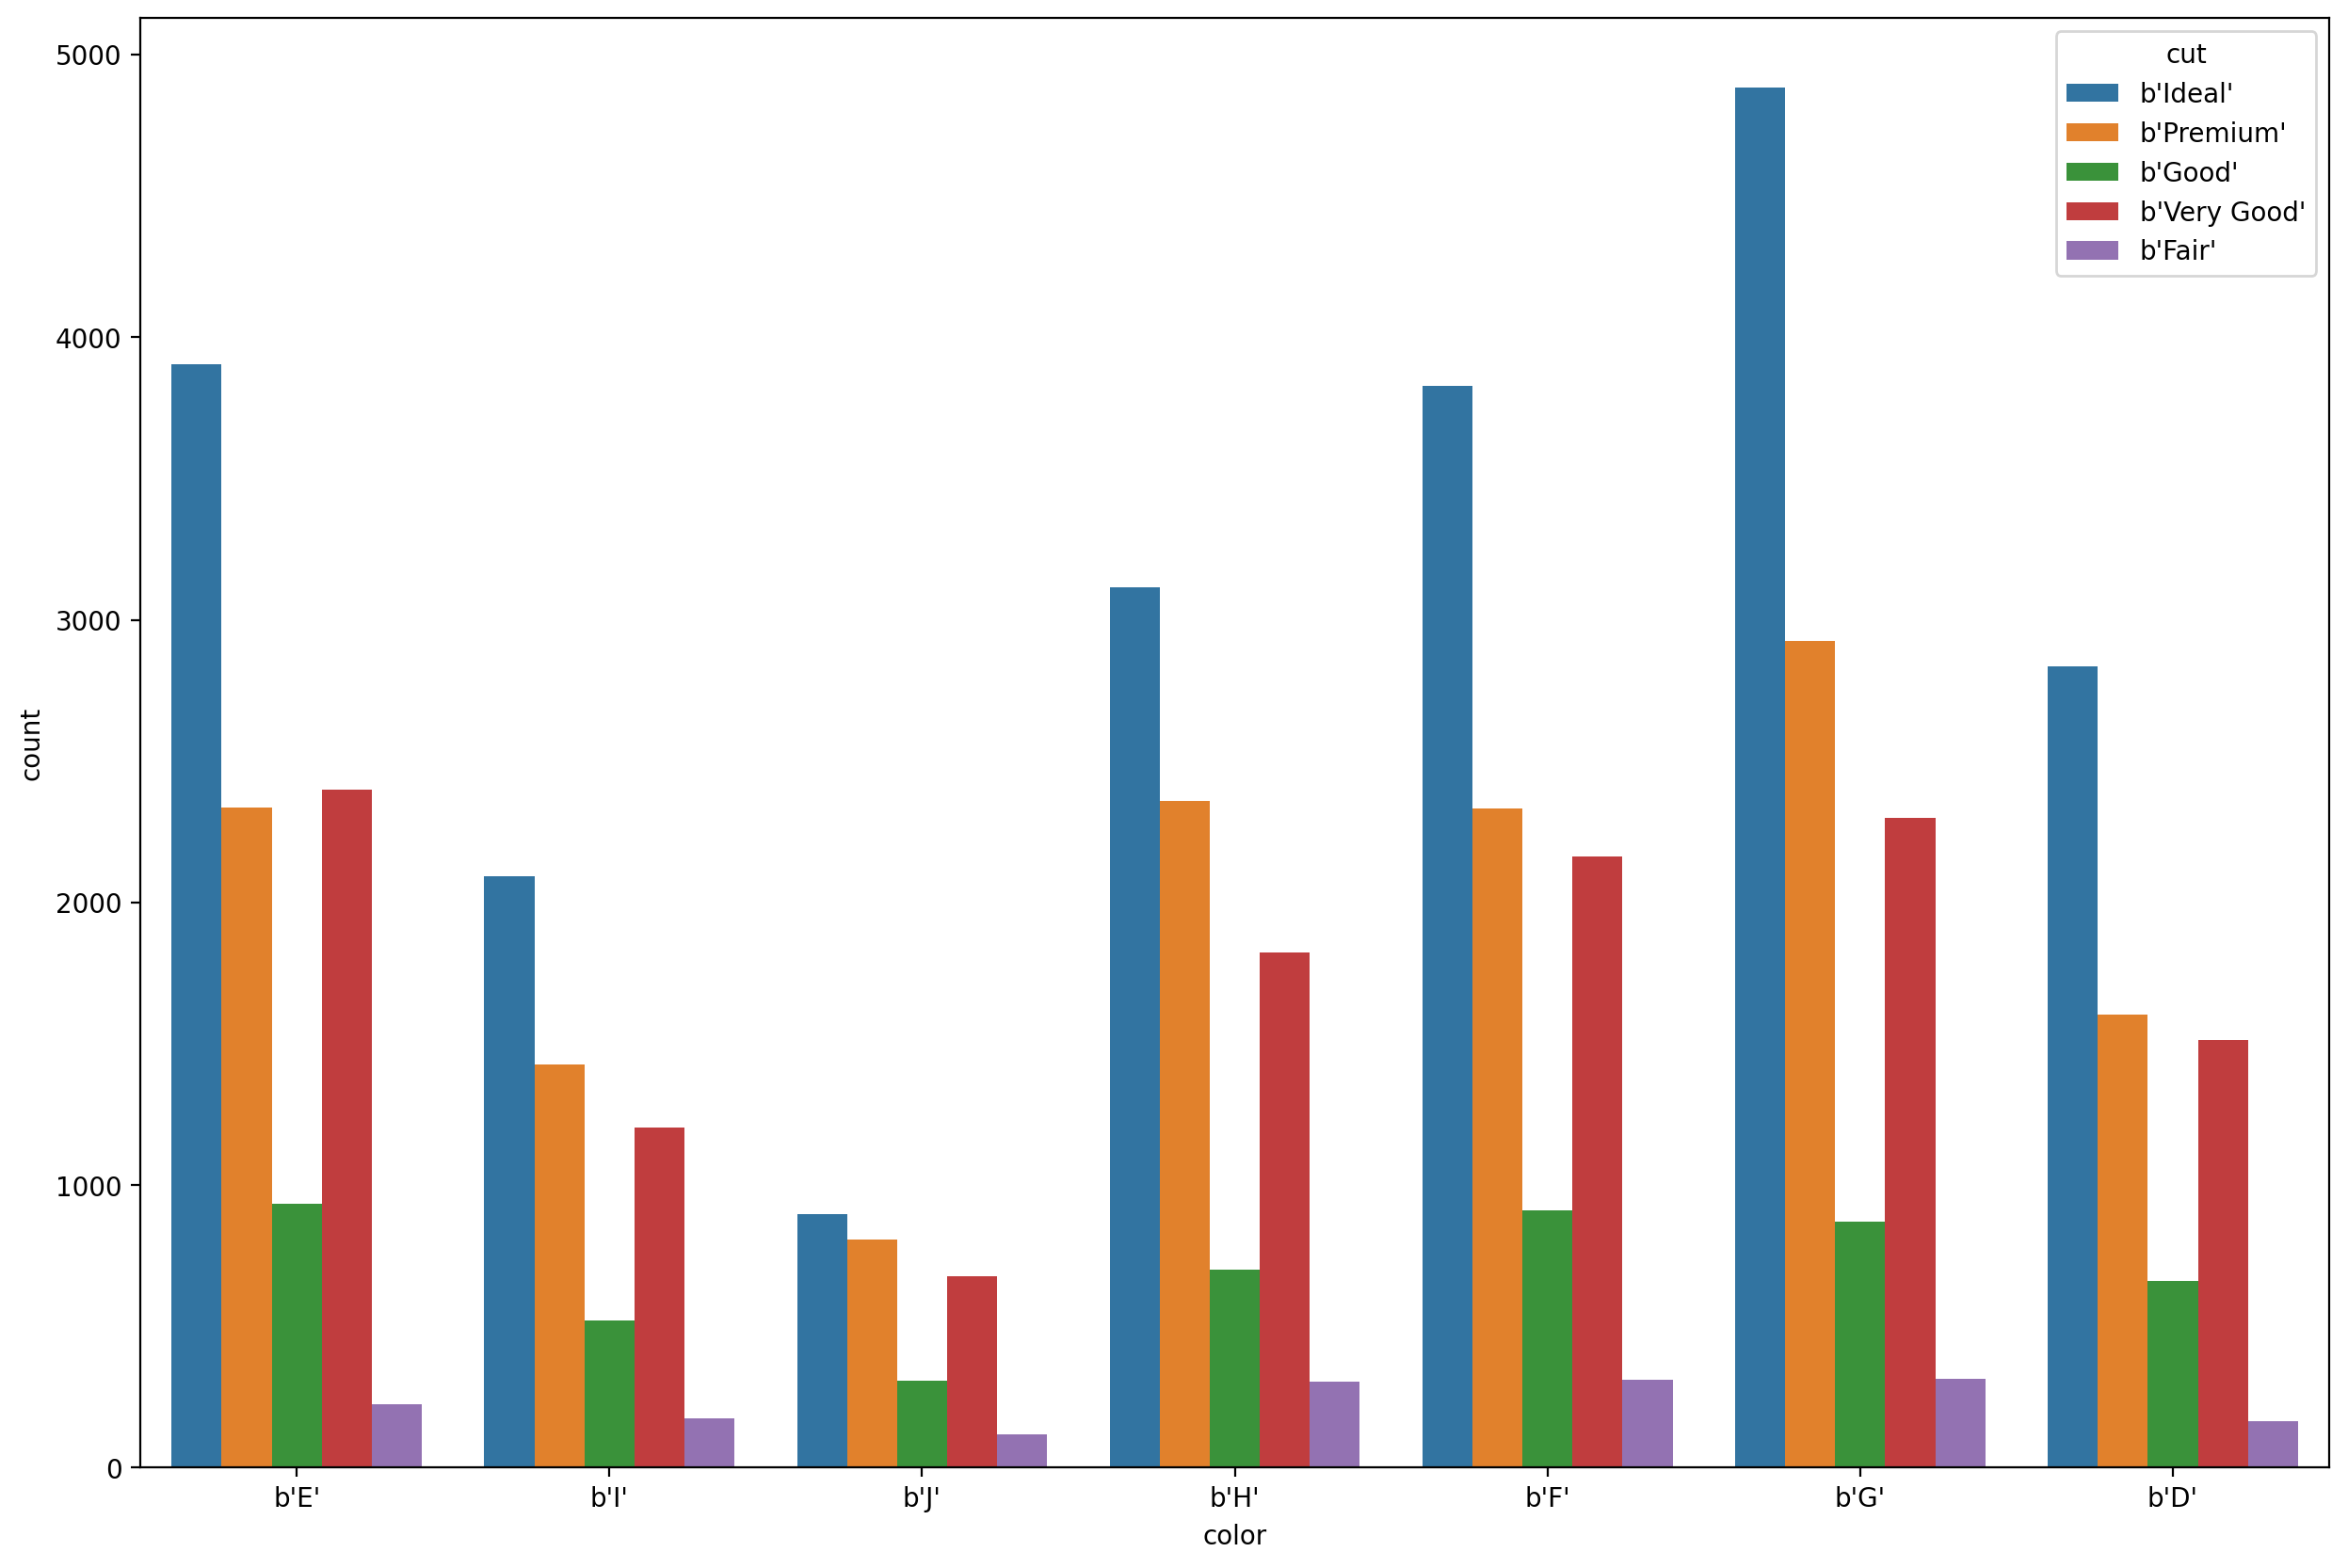

In [10]:
plt.figure(figsize=(15,10),dpi=200)
sns.countplot(data = df,x="color",hue="cut")

<AxesSubplot:xlabel='clarity'>

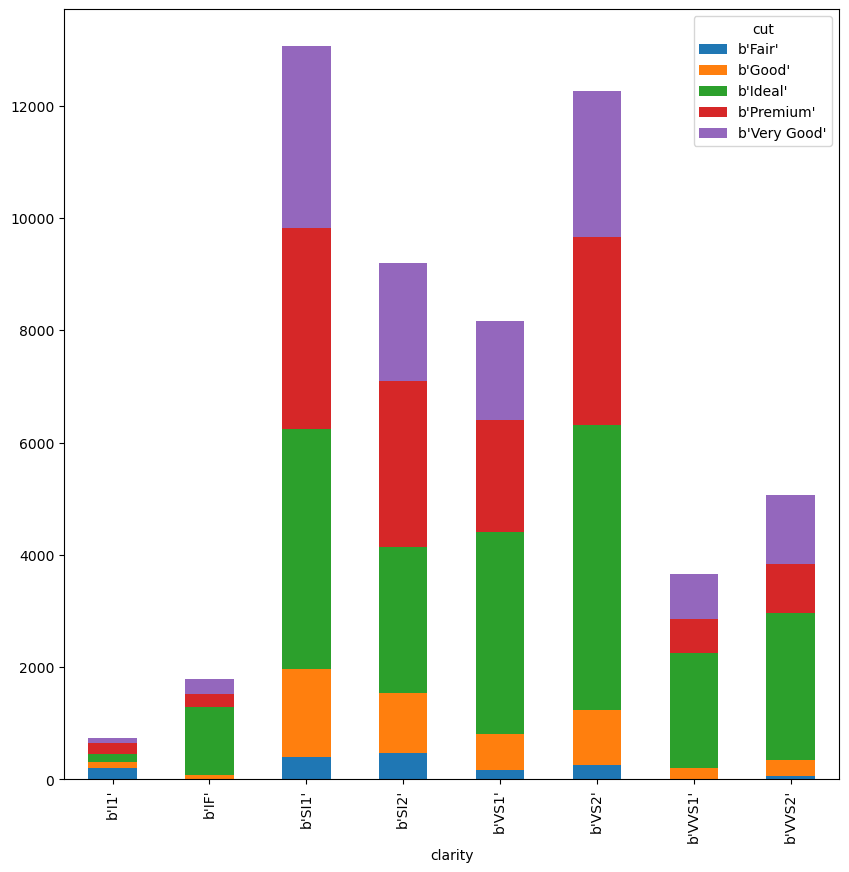

In [11]:
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':"'x'"}>,
        <AxesSubplot:title={'center':"'y'"}>],
       [<AxesSubplot:title={'center':"'z'"}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

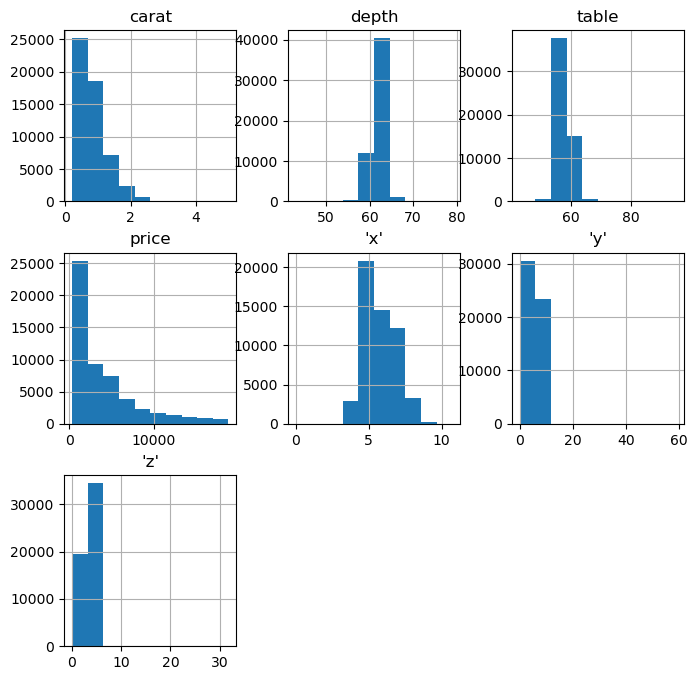

In [12]:
df.hist(figsize=(8,8))

<AxesSubplot:>

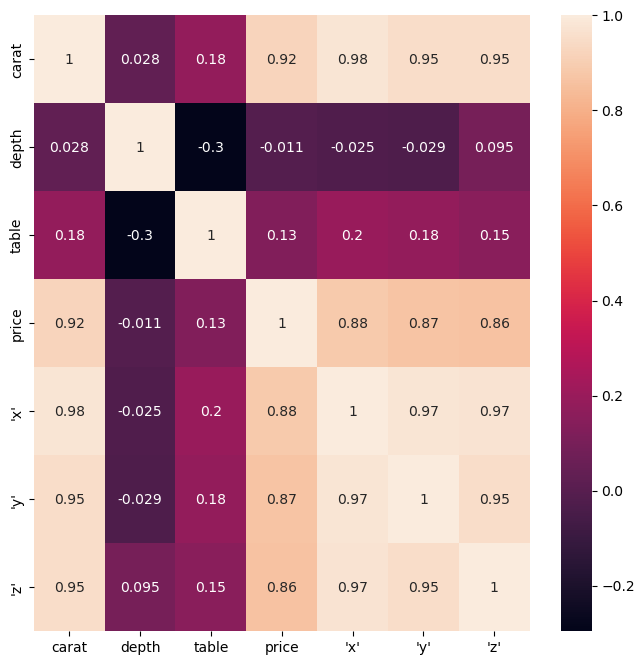

In [13]:
plt.figure(figsize=[8,8])
sns.heatmap(df.corr(),annot=True)

# **LABEL ENCODING**

In [14]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [15]:
df=labelencoder(df.copy())
display(df)

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


# **SPLITTING INTO INDEPENDENT AND DEPENDENT VARIABLES**

In [16]:
#dependent variable
y=df['cut']
y

0        2
1        3
2        1
3        3
4        1
        ..
53935    2
53936    1
53937    4
53938    3
53939    2
Name: cut, Length: 53940, dtype: int64

In [17]:
#independent variable
X=df.drop(columns='cut',axis=1)
X.head()

,carat,color,clarity,depth,table,price,'x','y','z'
0,0.23,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,6,3,63.3,58.0,335.0,4.34,4.35,2.75


# **SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA**

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#0.3 indicates 30% test dataset and remaining 70% training dataset which is ideal size of dataset for ml algorithms training and testing 

# **DIAMOND CUT CLASSIFICATION**

In [19]:
def classify(model):
    model.fit(X_train, y_train)
    print('Accuracy:', model.score(X_train, y_train))

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=3000)
classify(model)

Accuracy: 0.5423751258011548


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.9999470310927485


In [22]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()  
classify(model)

Accuracy: 0.5725938873881031


In [23]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8269505800095344


Among the algorithms taken, Random Forest Classifier gave the highest accuracy